<a href="https://colab.research.google.com/github/david-1192/Senales_y_Sistemas_2025/blob/main/Parcial_1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Cristian David Chalaca Salas`
## **`Parcial 1 Señales y Sistemas 2025-2`**

Resumen de librerías importadas:
NumPy: permite operar con arreglos numéricos y realizar cálculos matemáticos eficientes.
- SymPy: facilita el manejo de matemáticas simbólicas, como variables algebraicas y simplificación de expresiones.
- Matplotlib.pyplot: útil para graficar y visualizar señales o funciones.
- scipy.spatial.distance.cdist: calcula distancias entre vectores, lo cual es clave en cuantización para asignar niveles cercanos a las muestras.


# 1 PUNTO:

En este ejercicio se determina la **distancia media** entre dos señales complejas de la forma:

$$
x_1(t) = A e^{-j n \omega_0 t}, \qquad x_2(t) = B e^{j m \omega_0 t}
$$

Estas señales corresponden a **componentes armónicas** de una serie de Fourier, con frecuencias angulares
$\pm n\omega_0 \ y  \pm m\omega_0.$  
El análisis se realiza tanto **simbólicamente** como **numéricamente**, utilizando las librerías `NumPy`, `SymPy` y `Matplotlib`.


Se definen las constantes principales:

$A, B:$ amplitudes de cada señal.  
$n, m:$ índices armónicos.  
$\omega_0:$ frecuencia fundamental $rad/s.$

Expresión simbólica |x1 - x2|^2 = 1

Distancia media teórica (d²) = 1
Distancia media teórica (d)  = 1.0

--- Resultados numéricos ---
Distancia media numérica (d²) = 1.00000
Distancia media numérica (d)  = 1.00000


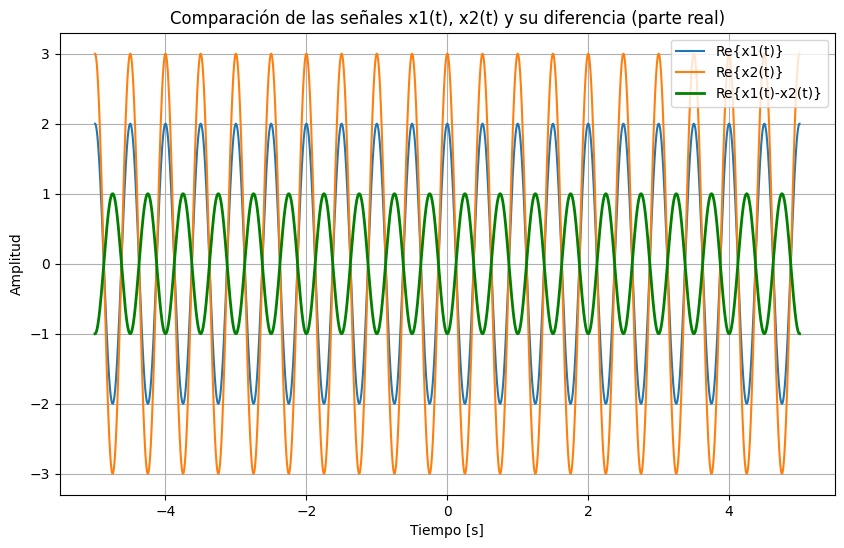

In [30]:
# ============================================
# EJERCICIO: Distancia media entre dos señales complejas
# x1(t) = A * e^{-j n ω0 t}
# x2(t) = B * e^{+j m ω0 t}
# ============================================

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# =========================================================
# 1. Definición de parámetros
# =========================================================
A = 2           # amplitud de la primera señal
B = 3           # amplitud de la segunda señal
n = 2           # índice armónico de x1(t)
m = -2          # índice armónico de x2(t)
w0 = 2 * np.pi  # frecuencia fundamental (rad/s)

# =========================================================
# 2. Definición simbólica para ver el desarrollo algebraico
# =========================================================
t = sp.symbols('t', real=True)
x1 = A * sp.exp(-sp.I * n * w0 * t)
x2 = B * sp.exp(sp.I * m * w0 * t)

# Expresión simbólica de |x1 - x2|^2
expr = sp.simplify(abs(x1 - x2)**2)
print("Expresión simbólica |x1 - x2|^2 =", expr)

# Promedio en el tiempo (teórico)
# Se usa el resultado de promedio de coseno -> 0 o 1 dependiendo de n+m
if n + m == 0:
    d2_teorico = (A - B)**2
else:
    d2_teorico = A**2 + B**2

print(f"\nDistancia media teórica (d²) = {d2_teorico}")
print(f"Distancia media teórica (d)  = {np.sqrt(d2_teorico)}")

# =========================================================
# 3. Cálculo numérico (integral temporal aproximada)
# =========================================================
T = 10  # segundos de simulación
fs = 10000  # frecuencia de muestreo
t_vals = np.linspace(-T/2, T/2, int(T*fs))

x1_vals = A * np.exp(-1j * n * w0 * t_vals)
x2_vals = B * np.exp( 1j * m * w0 * t_vals)

# Distancia punto a punto (instantánea)
diff = np.abs(x1_vals - x2_vals)**2

# Promedio temporal (integral numérica)
d2_numerico = np.trapezoid(diff, t_vals) / T
d_numerico = np.sqrt(d2_numerico)

print("\n--- Resultados numéricos ---")
print(f"Distancia media numérica (d²) = {d2_numerico:.5f}")
print(f"Distancia media numérica (d)  = {d_numerico:.5f}")

# =========================================================
# 4. Visualización de las señales y su diferencia
# =========================================================
plt.figure(figsize=(10,6))
plt.plot(t_vals, np.real(x1_vals), label='Re{x1(t)}')
plt.plot(t_vals, np.real(x2_vals), label='Re{x2(t)}')
plt.plot(t_vals, np.real(x1_vals - x2_vals), label='Re{x1(t)-x2(t)}', color='green', linewidth=2)
plt.title("Comparación de las señales x1(t), x2(t) y su diferencia (parte real)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# =========================================================
# 5. (Opcional) Distancia con scipy.spatial.distance.cdist
# =========================================================
# Creamos vectores 2D: [Re, Im] para cada muestra y calculamos distancia media
x1_points = np.column_stack((np.real(x1_vals), np.imag(x1_vals)))
x2_points = np.column_stack((np.real(x2_vals), np.imag(x2_vals)))

# 2 PUNTO:

Se desea muestrear y cuantizar la señal continua:
$$
x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)
$$

Usando:
- Frecuencia de muestreo: $F_s = 5\,\text{kHz}$
- Resolución del ADC:  $N = 4\,\text{bits}$
- Rango de amplitud:  $V_{\min} = -18\,\text{V}, \; V_{\max} = 18\,\text{V}$

---

## Parámetros del proceso
Periodo de muestreo:
$$
T_s = \frac{1}{F_s}
$$

Número de niveles:
$$
L = 2^N
$$

Paso de cuantización:
$$
\Delta = \frac{V_{\max} - V_{\min}}{L}
$$

---

## Observación
La frecuencia más alta en la señal es:
$$
f_{\max} = \frac{11000\pi}{2\pi} = 5500\,\text{Hz}
$$

El criterio de Nyquist exige:
$$
F_s \ge 2 f_{\max} = 11000\,\text{Hz}
$$

Dado que \( F_s = 5000 < 11000 \), **habrá aliasing**.  
Por ello luego se propone una alternativa de muestreo adecuada.


=== Simulación con Fs = 5 kHz (caso original) ===


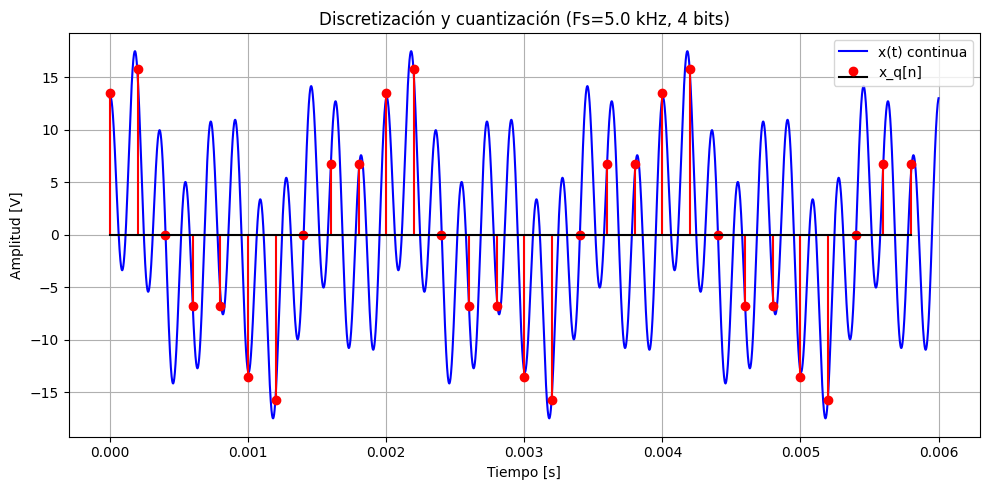

SNR estimado (Fs=5.0 kHz): 22.61 dB


In [31]:
# =====================================================
# Definición de la señal continua
# x(t) = 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)
# =====================================================
def x_t(t):
    return 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# =====================================================
# Parámetros generales del ADC
# =====================================================
N_bits = 4                 # Resolución del ADC (4 bits)
L = 2**N_bits              # Número de niveles de cuantización
Vmax, Vmin = 18, -18       # Rango de entrada del ADC
Delta = (Vmax - Vmin)/L    # Paso de cuantización
t_total = 0.006            # 6 ms → ~3 periodos de la señal más lenta (500 Hz)

# =====================================================
# Función que realiza la simulación completa
# =====================================================
def simular(Fs):
    Ts = 1/Fs                               # Periodo de muestreo
    t_cont = np.linspace(0, t_total, 10000) # Tiempo continuo para graficar señal original
    t_disc = np.arange(0, t_total, Ts)      # Tiempo discreto según Fs

    # Señales continua y muestreada
    x_cont = x_t(t_cont)
    x_disc = x_t(t_disc)

    # =====================================================
    # Cuantización uniforme (mid-rise)
    # =====================================================
    xq = Delta * np.round(x_disc / Delta)   # Cuantización al nivel más cercano
    xq = np.clip(xq, Vmin, Vmax - Delta)    # Saturación para evitar desbordamiento

    # =====================================================
    # Cálculo del error y SNR
    # =====================================================
    error = x_disc - xq                     # Error de cuantización (señal original - señal cuantizada)
    snr = 10*np.log10(np.mean(x_disc**2) / np.mean(error**2))  # SNR en dB: relación potencia señal/potencia error

    # =====================================================
    # Gráfica comparativa
    # =====================================================
    plt.figure(figsize=(10,5))
    plt.plot(t_cont, x_cont, 'b', label='x(t) continua')  # Señal original continua
    plt.stem(t_disc, xq, linefmt='r-', markerfmt='ro', basefmt='k-', label='x_q[n]')  # Señal discreta cuantizada
    plt.title(f'Discretización y cuantización (Fs={Fs/1000:.1f} kHz, {N_bits} bits)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"SNR estimado (Fs={Fs/1000:.1f} kHz): {snr:.2f} dB")
    return snr

# =====================================================
# Simulación 1: caso original (Fs = 5000 Hz)
# =====================================================
print("=== Simulación con Fs = 5 kHz (caso original) ===")
snr_5k = simular(5000)

# Alternativa de Muestreo (Diseño propuesto)

Como la señal original con $$F_s = 5\,\text{kHz}$$ **viola el criterio de Nyquist**,  
se propone un nuevo conversor A/D con una frecuencia de muestreo:

$$
F_s = 12\,\text{kHz}
$$

Esto garantiza:
$$
F_s = 12000 > 2 f_{\max} = 11000
$$

Así se evita aliasing y la reconstrucción digital puede representar correctamente las tres componentes de la señal.

Se mantiene:
- Resolución: $N = 4\,\text{bits}$
- Rango: $[-18\,\text{V}, 18\,\text{V}]$
- Mismo tiempo de observación (≈ 6 ms)


=== Simulación con Fs = 12 kHz (alternativa propuesta) ===


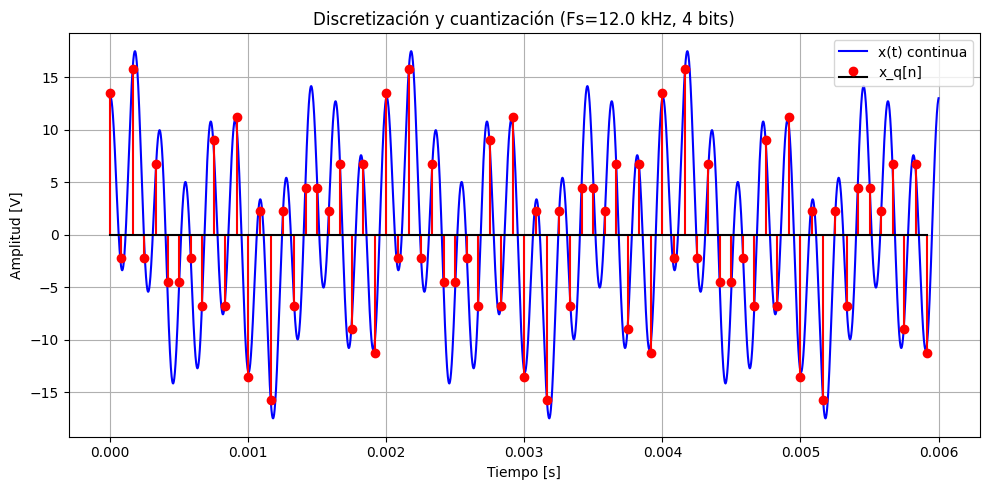

SNR estimado (Fs=12.0 kHz): 22.11 dB

Comparación de SNR:
Fs = 5 kHz  → 22.61 dB (anterior)
Fs = 12 kHz → 22.11 dB (actual)


In [32]:
# =====================================================
# Simulación 2: Fs = 12 kHz (alternativa propuesta)
# =====================================================
print("=== Simulación con Fs = 12 kHz (alternativa propuesta) ===")
snr_12k = simular(12000)
# Se repite la simulación con una frecuencia de muestreo mayor
# para cumplir el criterio de Nyquist y evitar aliasing.
print(f"\nComparación de SNR:")
print(f"Fs = 5 kHz  → {snr_5k:.2f} dB (anterior)")
print(f"Fs = 12 kHz → {snr_12k:.2f} dB (actual)")


## Conceptos clave

## Muestreo
$$
T_s = \frac{1}{F_s}, \quad F_s \ge 2 f_{\max}
$$

## Cuantización uniforme
$$
L = 2^N, \quad \Delta = \frac{V_{\max} - V_{\min}}{L}
$$

- Cuantización:
$$
x_q[n] = \Delta \cdot \mathrm{round}\!\left(\frac{x[n]}{\Delta}\right)
$$

- Error de cuantización:
$$
e_q[n] = x[n] - x_q[n], \quad |e_q[n]| \le \frac{\Delta}{2}
$$

## Relación señal-ruido (SNR)
$$
\text{SNR}_{\text{dB}} \approx 6.02\,N + 1.76
$$

---

## conclusión
- Para $F_s = 5\,\text{kHz}$, ocurre **aliasing**: las componentes de alta frecuencia se pliegan.
- Al usar $F_s = 12\,\text{kHz}$, se cumple el criterio de Nyquist y la señal se representa fielmente.
- Una **mayor resolución (más bits)** mejora la SNR y reduce el error de cuantización.



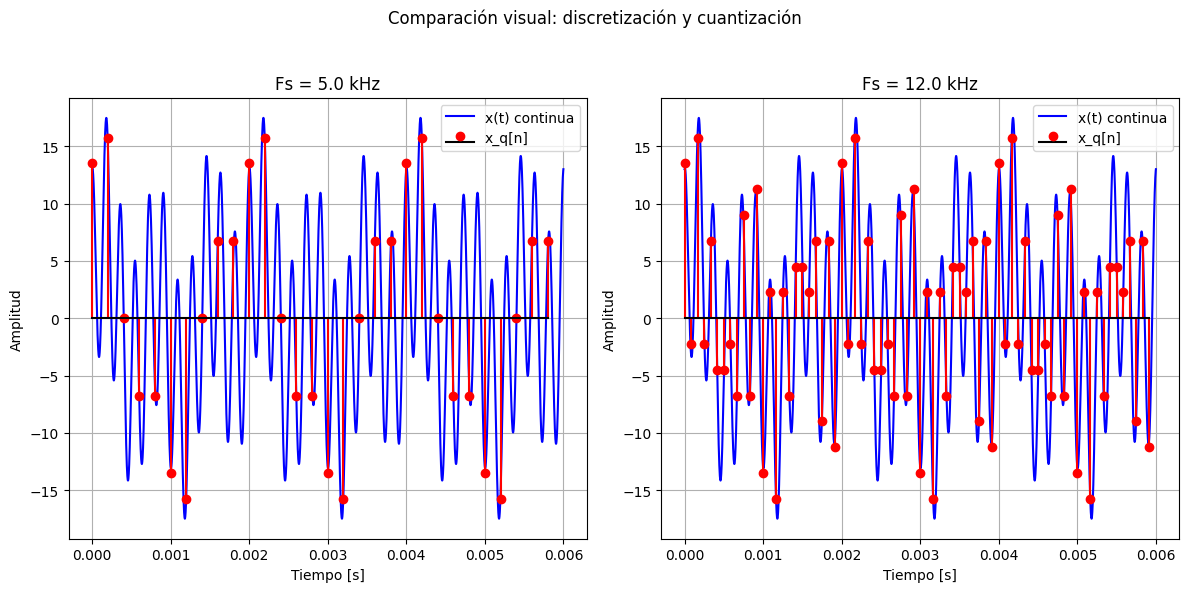

In [33]:
# =====================================================
# Comparación visual entre Fs = 5 kHz y Fs = 12 kHz
# =====================================================

def comparar_fs(Fs_list):
    plt.figure(figsize=(12,6))
    t_cont = np.linspace(0, t_total, 10000)
    x_cont = x_t(t_cont)

    for i, Fs in enumerate(Fs_list, 1):
        Ts = 1/Fs
        t_disc = np.arange(0, t_total, Ts)
        x_disc = x_t(t_disc)
        xq = Delta * np.round(x_disc / Delta)
        xq = np.clip(xq, Vmin, Vmax - Delta)

        plt.subplot(1, 2, i)
        plt.plot(t_cont, x_cont, 'b', label='x(t) continua')
        plt.stem(t_disc, xq, linefmt='r-', markerfmt='ro', basefmt='k-', label='x_q[n]')
        plt.title(f'Fs = {Fs/1000:.1f} kHz')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Amplitud')
        plt.grid(True)
        plt.legend()

    plt.suptitle('Comparación visual: discretización y cuantización')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# =====================================================
# Ejecutar comparación
# =====================================================
comparar_fs([5000, 12000])


# 4 PUNTO:
Encuentre el espectro de Fourier, parte real, parte imaginaria, su magnitud, fase, y el error relativo de reconstrucción para **n ∈ {0, ±1, ±2, ±3, ±4, ±5}**, a partir de **x′′(t)** para la señal **x(t)** en la Figura 1. (es una onda triangular doblemente simétrica respecto al eje vertical)

Compruebe el espectro obtenido con la estimación a partir de x(t) y presente las respectivas simulaciones sobre Python.

# Análisis de la Serie de Fourier - Señal Original y Reconstrucciones

## Descripción de la señal
La señal analizada es una función triangular doblemente simétrica con parámetros:
- **Amplitud (A)**: 1.0
- **Posición de picos (±d₁)**: 0.2
- **Retorno a cero (±d₂)**: 0.4
- **Período (T)**: 1.0

## Características de la señal
- **Simetría**: La señal presenta simetría par (x(t) = x(-t))
- **Forma**: Triangular con pendientes lineales
- **Dominio temporal**: Definida por tramos lineales

## Métodos de cálculo de coeficientes
1. **Método analítico**: Utilizando la segunda derivada y propiedades de los saltos
2. **Método numérico**: Integración directa de x(t)·e^(-j·n·ω₀·t)

## Reconstrucciones
Se realizan reconstrucciones usando la serie compleja de Fourier para:
- **N = 3**: Incluye armónicos desde -3 hasta +3
- **N = 5**: Incluye armónicos desde -5 hasta +5

El error de reconstrucción disminuye a medida que aumenta el número de armónicos considerados.

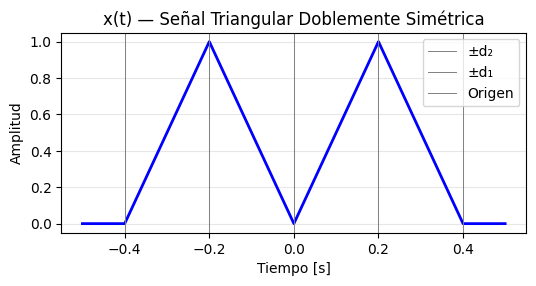

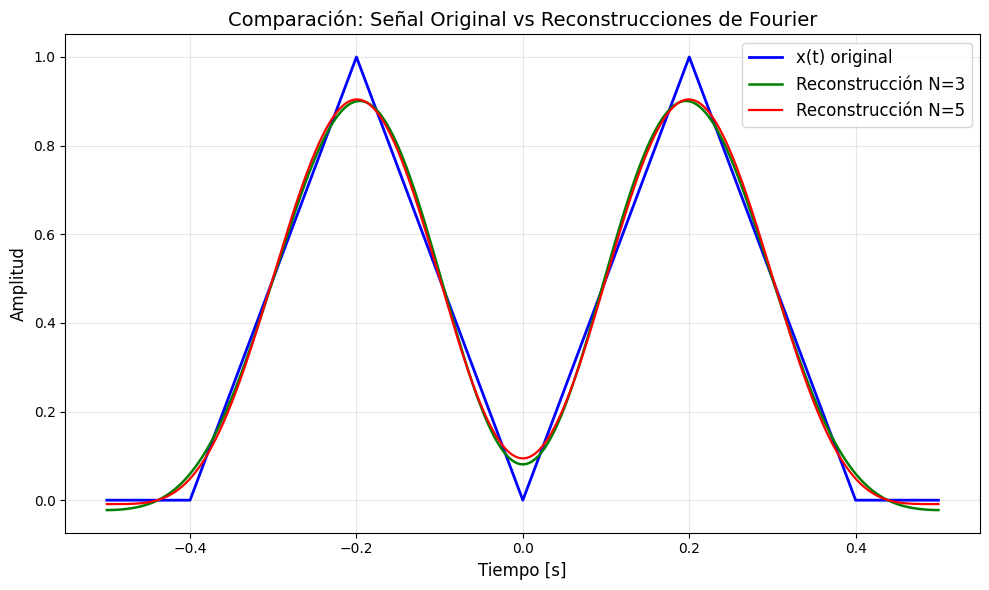

In [34]:
# =============================================================================
# CONFIGURACIÓN DE PARÁMETROS Y DEFINICIÓN DE LA SEÑAL
# =============================================================================

# ---------------------------
# Parámetros de la señal triangular
# ---------------------------
A  = 1.0     # amplitud de los picos
d1 = 0.2     # posición de los picos (±d1)
d2 = 0.4     # posición donde la señal vuelve a cero (±d2)
T  = 1.0     # período fundamental
omega0 = 2*np.pi / T  # frecuencia angular fundamental

# ---------------------------
# Vector de tiempo (un período centrado en cero)
# ---------------------------
Nsamples = 2000  # número de puntos para una representación suave
t = np.linspace(-T/2, T/2, Nsamples, endpoint=False)  # vector tiempo en un período
dt = t[1] - t[0]  # resolución temporal

# ---------------------------
# Definición por tramos de la señal x(t)
# La señal es triangular y simétrica con respecto al origen
# ---------------------------
x = np.zeros_like(t)  # inicializar con ceros

# TRAMO 1: -d2 <= t <= -d1 (pendiente positiva)
mask = (t >= -d2) & (t <= -d1)  # máscara para el primer tramo
x[mask] = A * (t[mask] + d2) / (d2 - d1)  # línea que sube de 0 a A

# TRAMO 2: -d1 <= t <= 0 (pendiente negativa)
mask = (t > -d1) & (t <= 0)  # máscara para el segundo tramo
x[mask] = - (A / d1) * t[mask]   # en t=-d1 -> A; en t=0 -> 0

# TRAMO 3: 0 <= t <= d1 (pendiente positiva)
mask = (t > 0) & (t <= d1)  # máscara para el tercer tramo
x[mask] = (A / d1) * t[mask]     # en t=0 -> 0; en t=d1 -> A

# TRAMO 4: d1 <= t <= d2 (pendiente negativa)
mask = (t > d1) & (t <= d2)  # máscara para el cuarto tramo
x[mask] = A * (d2 - t[mask]) / (d2 - d1)  # línea que baja de A a 0

# Nota: fuera de [-d2, d2] la señal es cero (por inicialización)

# =============================================================================
# VISUALIZACIÓN DE LA SEÑAL ORIGINAL
# =============================================================================

# ---------------------------
# Grafica x(t) para verificar la forma de la señal
# ---------------------------
plt.figure(figsize=(6,2.6))
plt.plot(t, x, linewidth=2, color='blue')  # graficar señal original
# Líneas verticales para marcar los puntos característicos
plt.axvline(-d2, color='gray', linewidth=0.7, label='±d₂')
plt.axvline(-d1, color='gray', linewidth=0.7, label='±d₁')
plt.axvline( 0 , color='gray', linewidth=0.7, label='Origen')
plt.axvline( d1, color='gray', linewidth=0.7)
plt.axvline( d2, color='gray', linewidth=0.7)
plt.title('x(t) — Señal Triangular Doblemente Simétrica')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)  # cuadrícula semitransparente
plt.legend()  # mostrar leyenda
plt.show()

# =============================================================================
# CÁLCULO DE COEFICIENTES DE FOURIER POR DOS MÉTODOS
# =============================================================================

# ---------------------------
# Vector de índices armónicos: n ∈ {-5, -4, ..., +4, +5}
# ---------------------------
N_max = 5
nv = np.arange(-N_max, N_max + 1)  # vector de armónicos desde -5 hasta +5

# ---------------------------
# MÉTODO 1: Analítico usando segunda derivada (más preciso)
# Basado en los saltos de la primera derivada de x(t)
# ---------------------------

# Coeficientes para los saltos en la segunda derivada
a = A / (d2 - d1)  # pendiente en los tramos exteriores
b = -A * (1.0/d1 + 1.0/(d2 - d1))  # contribución de los puntos ±d1
c = 2.0 * A / d1  # contribución del punto central (t=0)

# Calcular coeficientes de la serie de x''(t)
Xpp = np.zeros_like(nv, dtype=float)  # inicializar coeficientes de segunda derivada
nonzero = nv != 0  # máscara para índices no cero

# Para n ≠ 0: cálculo completo usando la fórmula de los saltos
Xpp[nonzero] = (1.0 / T) * (2*a*np.cos(nv[nonzero]*omega0*d2) +
                            2*b*np.cos(nv[nonzero]*omega0*d1) +
                            c)  # fórmula de saltos en segunda derivada

# Para n = 0: valor promedio (aunque no se usará directamente)
Xpp[~nonzero] = (1.0 / T) * (2*a + 2*b + c)  # caso n=0

# Calcular c_n a partir de X''_n usando: c_n = -X''_n / (n²ω₀²)
Cn_analytic = np.zeros_like(nv, dtype=np.complex128)  # coeficientes analíticos
Cn_analytic[nonzero] = -Xpp[nonzero] / ((nv[nonzero]**2) * (omega0**2))  # relación fundamental

# Coeficiente DC (n=0) por integración directa
c0 = (1.0 / T) * np.trapezoid(x, t)  # valor promedio de la señal
Cn_analytic[nv == 0] = c0  # asignar componente DC

# ---------------------------
# MÉTODO 2: Numérico directo (validación del método analítico)
# Integración numérica de la definición de los coeficientes de Fourier
# ---------------------------
Cn_numeric = np.zeros_like(nv, dtype=np.complex128)  # coeficientes numéricos
for i, n in enumerate(nv):
    integrand = x * np.exp(-1j * n * omega0 * t)  # x(t)e^(-j n ω₀ t)
    Cn_numeric[i] = (1.0 / T) * np.trapezoid(integrand, t)  # integración trapezoidal

# =============================================================================
# RECONSTRUCCIÓN DE LA SEÑAL USANDO LA SERIE DE FOURIER TRUNCADA
# =============================================================================

# ---------------------------
# Reconstrucción con N = 5 (armónicos desde -5 hasta +5)
# ---------------------------
N_max_5 = 5
nv_5 = np.arange(-N_max_5, N_max_5 + 1)  # armónicos para reconstrucción N=5
x_rec_5 = np.zeros_like(t, dtype=np.complex128)  # inicializar señal reconstruida
for i, n in enumerate(nv_5):
    idx = np.where(nv == n)[0][0]  # encontrar índice correspondiente en Cn_analytic
    x_rec_5 += Cn_analytic[idx] * np.exp(1j * n * omega0 * t)  # suma de armónicos
x_rec_5 = np.real(x_rec_5)  # tomar parte real (la señal original es real)

# ---------------------------
# Reconstrucción con N = 3 (armónicos desde -3 hasta +3)
# ---------------------------
N_max_3 = 3
nv_3 = np.arange(-N_max_3, N_max_3 + 1)  # armónicos para reconstrucción N=3
x_rec_3 = np.zeros_like(t, dtype=np.complex128)  # inicializar señal reconstruida
for i, n in enumerate(nv_3):
    idx = np.where(nv == n)[0][0]  # índice en vector original de coeficientes
    x_rec_3 += Cn_analytic[idx] * np.exp(1j * n * omega0 * t)  # síntesis armónica
x_rec_3 = np.real(x_rec_3)  # extraer parte real

# =============================================================================
# COMPARACIÓN VISUAL: SEÑAL ORIGINAL VS RECONSTRUCCIONES
# =============================================================================

# ---------------------------
# Gráfica comparativa de las reconstrucciones
# ---------------------------
plt.figure(figsize=(10,6))
plt.plot(t, x, color='blue', linewidth=2.0, label='x(t) original')  # señal original
plt.plot(t, x_rec_3, color='green', linewidth=1.8,
         label='Reconstrucción N=3')  # reconstrucción con 3 armónicos
plt.plot(t, x_rec_5, color='red', linewidth=1.6,
         label='Reconstrucción N=5')  # reconstrucción con 5 armónicos
plt.legend(fontsize=12)  # leyenda con tamaño de fuente
plt.grid(True, alpha=0.3)  # cuadrícula semitransparente
plt.title('Comparación: Señal Original vs Reconstrucciones de Fourier', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.tight_layout()  # ajustar layout para mejor visualización
plt.show()

# Espectro de Magnitud |cₙ|

## Interpretación del espectro
El gráfico muestra la magnitud de los coeficientes complejos de Fourier cₙ para n ∈ {-5, -4, ..., +5}

## Propiedades observadas
- **Simetría**: |cₙ| = |c₋ₙ| (propiedad de señales reales)
- **Decaimiento**: Los coeficientes decrecen rápidamente con |n|
- **Componente DC**: c₀ representa el valor promedio de la señal

## Significado físico
- Cada |cₙ| representa la contribución energética del armónico n-ésimo
- El decaimiento rápido indica que la señal puede aproximarse bien con pocos armónicos
- La simetría confirma que trabajamos con una señal real en el dominio temporal

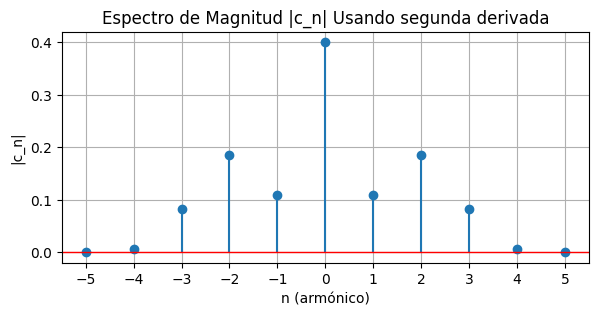

In [35]:
# ---------------------------
# Graficar espectro (magnitud) usando la versión derivada (Cn_analytic)
# ---------------------------
plt.figure(figsize=(6.8,3))
# Diagrama de tallos para representar coeficientes discretos de Fourier
plt.stem(nv, np.abs(Cn_analytic), basefmt=" ")

# Título y etiquetas de ejes
plt.title("Espectro de Magnitud |c_n| Usando segunda derivada")
plt.xlabel("n (armónico)")  # Índice del armónico
plt.ylabel("|c_n|")  # Magnitud del coeficiente complejo

# Línea de referencia en cero para mejor visualización
plt.axhline(0, color='red', linewidth=1)

# Cuadrícula y marcas específicas en eje x
plt.grid(True)
plt.xticks(nv)  # Mostrar todos los valores de n (-5 a +5)
plt.show()

# Propiedades Complejas de los Coeficientes de Fourier

## Análisis de las componentes

### Parte Real Re{cₙ}
- Representa la componente en fase de cada armónico
- Para señales reales: Re{cₙ} = Re{c₋ₙ}

### Parte Imaginaria Im{cₙ}  
- Representa la componente en cuadratura de cada armónico
- Para señales reales: Im{cₙ} = -Im{c₋ₙ}

### Magnitud |cₙ|
- Valor absoluto del coeficiente complejo
- Determina la potencia contenida en cada armónico

### Fase ∠cₙ [rad]
- Ángulo de fase de cada componente espectral
- Para esta señal simétrica: las fases son 0 o π radianes

## Conclusiones
La señal analizada presenta características de simetría que se reflejan en sus coeficientes de Fourier, siendo una señal real con simetría par en el dominio temporal.

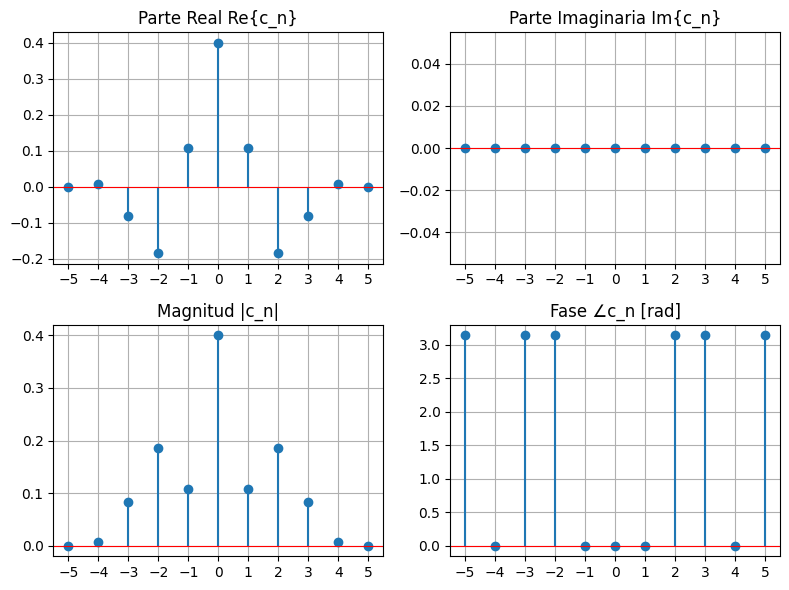

In [36]:
# ---------------------------
# Matriz 2x2: Re{Cn}, Im{Cn}, |Cn|, angle(Cn)
# ---------------------------
# Crear figura con 4 subplots en disposición 2x2
fig = plt.figure(figsize=(8,6))

# Subplot 1: Parte Real de los coeficientes
ax1 = fig.add_subplot(2,2,1)
ax1.stem(nv, np.real(Cn_analytic), basefmt=" ")  # Diagrama de tallos para parte real
ax1.set_title('Parte Real Re{c_n}')
plt.axhline(0, color='red', linewidth=0.8)  # Línea de referencia en cero
ax1.set_xticks(nv); ax1.grid(True)  # Marcas específicas y cuadrícula

# Subplot 2: Parte Imaginaria de los coeficientes
ax2 = fig.add_subplot(2,2,2)
ax2.stem(nv, np.imag(Cn_analytic), basefmt=" ")  # Diagrama de tallos para parte imaginaria
ax2.set_title('Parte Imaginaria Im{c_n}')
plt.axhline(0, color='red', linewidth=0.8)  # Línea de referencia en cero
ax2.set_xticks(nv); ax2.grid(True)  # Marcas específicas y cuadrícula

# Subplot 3: Magnitud de los coeficientes
ax3 = fig.add_subplot(2,2,3)
ax3.stem(nv, np.abs(Cn_analytic), basefmt=" ")  # Diagrama de tallos para magnitud
ax3.set_title('Magnitud |c_n|')
plt.axhline(0, color='red', linewidth=0.8)  # Línea de referencia en cero
ax3.set_xticks(nv); ax3.grid(True)  # Marcas específicas y cuadrícula

# Subplot 4: Fase de los coeficientes en radianes
ax4 = fig.add_subplot(2,2,4)
ax4.stem(nv, np.angle(Cn_analytic), basefmt=" ")  # Diagrama de tallos para fase
ax4.set_title('Fase ∠c_n [rad]')
plt.axhline(0, color='red', linewidth=0.8)  # Línea de referencia en cero
ax4.set_xticks(nv); ax4.grid(True)  # Marcas específicas y cuadrícula

# Ajustar espaciado entre subplots para mejor visualización
fig.tight_layout()
plt.show()